In [91]:
# 用plotly可视化曲线
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv('data.csv', delimiter=",")
# 转换日期格式
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Number of  reported results'],mode='lines',name='results'))
fig.show() 

In [105]:
pred = pd.read_csv('wordle.csv')

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=pred['count'], y=pred['Hard Mode Count'],mode='lines',name='results'))
fig.show()

In [69]:
# 把数据绘制在同一张图上
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Number of  reported results'],mode='lines',name='history'))
fig.add_trace(go.Scatter(x=pred['count'], y=pred['Hard Mode Count'],mode='lines',name='prediction'))
# 设置图表标题
fig.update_layout(title_text='Prediction of the number of reported results')
fig.show()

In [70]:
# 将两份数据中的日期和数量取出 合并为一个dataframe
df = df[['Date','Number of  reported results']]
pred = pred[['count','Hard Mode Count']]
# 统一列名为date和value
df.columns = ['date','value']
pred.columns = ['date','value']
# 合并两个dataframe
df = pd.concat([df,pred],axis=0)
# 重新排序
# 转换日期格式
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
# 保存为csv文件
df.to_csv('train.csv',index=False)

In [79]:
import pandas as pd
df = pd.read_csv('train.csv')
# 截取8月31日之后的数据
df = df[df['date']>'2022-08-31']
df['date'] = pd.to_datetime(df['date'])
# value有部分为字符串，而且带有逗号，需要去掉逗号并转换为int类型
df['value'] = df['value'].str.replace(',','')
df['value'] = df['value'].astype(int)
df['count'] = 1
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="count",
    timestamp_column="date"
)
train_data.head()

value
item_id timestamp        
1       2022-09-01  31903
        2022-09-02  35724
        2022-09-03  31191
        2022-09-04  32018
        2022-09-05  32733

In [81]:
predictor = TimeSeriesPredictor(
    prediction_length=15,
    path="autogluon-m4-hourly",
    target="value",
    eval_metric="sMAPE",
    ignore_time_index=True
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: medium_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'sMAPE',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'medium_quality',
 'prediction_length': 15,
 'random_seed': None,
 'target': 'value',
 'time_limit': 600}
Provided training data set with 167 rows, 1 items (item = single time series). Average time series length is 167.0.
Training artifacts will be saved to: C:\Users\User\Downloads\autogluon-m4-hourly
AutoGluon will save models to autogluon-m4-hourly\
AutoGluon will gauge predictive performance using evaluation metric: 'sMAPE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'value'
tuning_data is None. Will use the last prediction_length = 15 time steps of each time series

In [82]:
predictions = predictor.predict(train_data)
predictions.head()

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Following models failed during prediction: ['ETS']. WeightedEnsemble will set the weight of these models to zero and re-normalize the weights when predicting.


mean           0.1           0.2  \
item_id timestamp                                                       
1       1900-01-01 00:02:47  20266.127982  19638.371059  19857.382980   
        1900-01-01 00:02:48  20229.831763  19620.672497  19890.005706   
        1900-01-01 00:02:49  19636.199773  19068.116679  19219.321959   
        1900-01-01 00:02:50  19926.472356  19365.081645  19567.328917   
        1900-01-01 00:02:51  20058.998455  19532.599931  19729.375523   

                                      0.3           0.4           0.5  \
item_id timestamp                                                       
1       1900-01-01 00:02:47  20017.384527  20154.206537  20281.537064   
        1900-01-01 00:02:48  20023.724051  20149.612466  20248.081665   
        1900-01-01 00:02:49  19357.992452  19473.728523  19636.360808   
        1900-01-01 00:02:50  19710.582417  19825.709114  19958.941985   
        1900-01-01 00:02:51  19861.218868  19959.180526  20057.608709   

                                      0.6           0.7           0.8  \
item_id timestamp                                                       
1       1900-01-01 00:02:47  20406.131250  20551.576321  20746.812987   
        1900-01-01 00:02:48  20383.412179  20514.280102  20640.545088   
        1900-01-01 00:02:49  19757.255776  19932.160808  20048.793958   
        1900-01-01 00:02:50  20053.385781  20172.139446  20352.061658   
        1900-01-01 00:02:51  20184.909926  20310.597185  20456.989124   

                                      0.9  
item_id timestamp                          
1       1900-01-01 00:02:47  21052.155323  
        1900-01-01 00:02:48  20936.080784  
        1900-01-01 00:02:49  20422.856997  
        1900-01-01 00:02:50  20670.325869  
        1900-01-01 00:02:51  20743.450601

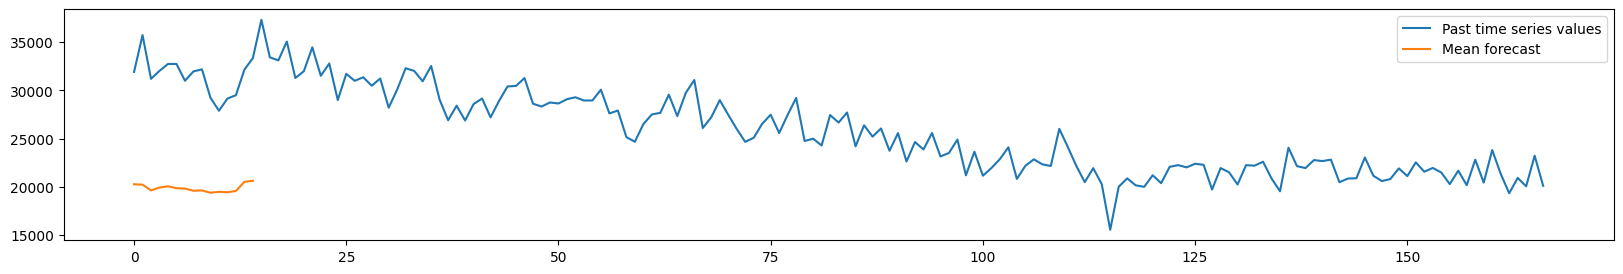

In [84]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file

plt.figure(figsize=(20, 3))

item_id = "1"
y_past = train_data["Number of  reported results"]
y_pred = predictions

plt.plot(y_past.values, label="Past time series values")
plt.plot(y_pred["mean"].values, label="Mean forecast")

plt.fill_between(
    y_pred.index, y_pred["0.1"].values, y_pred["0.9"].values, color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [104]:
# 取出predictions中的mean 0.1 0.9 三列，转换为dataframe并且增加一列从2023-02-16开始的日期

dataframe = predictions[['mean','0.1','0.9']]
dataframe['count'] = pd.date_range(start='2023-02-16', periods=len(predictions), freq='D')
dataframe = pd.DataFrame(dataframe)
dataframe['Hard Mode Count'] = dataframe['mean']

C:\Users\User\AppData\Local\Temp\ipykernel_16208\3194435401.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
# 把pred和dataframe合并
pred = pd.concat([pred,dataframe],axis=0)

In [109]:
# 转换日期格式并且排序
pred['count'] = pd.to_datetime(pred['count'])
pred = pred.sort_values(by='count')

In [119]:
# 把数据绘制在同一张图上
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Number of  reported results'],mode='lines',name='history'))
fig.add_trace(go.Scatter(x=pred['count'], y=pred['Hard Mode Count'],mode='lines',name='prediction'))
# 根据pred中的0.1和0.9填充背景区域
fig.add_trace(go.Scatter(x=pred['count'], y=pred['0.1'],fill=None,mode='lines',name='10% confidence interval'))
fig.add_trace(go.Scatter(x=pred['count'], y=pred['0.9'],fill='tonexty',mode='lines',name='90% confidence interval'))
# 设置图表标题
fig.update_layout(title_text='Prediction of the number of reported results')
fig.show()

In [123]:
import pandas as pd
time  = pd.read_csv('time.csv')
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=time['date'], y=time['hot'],mode='lines',name='time'))
# google trend about "wordle"
fig.update_layout(title_text='Google trend about "wordle"')
fig.show()
